# US primary elections 2016

The idea of this notebook is to visualise the US primary election data and based on the insight use a model to predict the result of the election in future counties 

In [317]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [318]:
demographicData = pd.read_csv("dataset\county_facts.csv")
resultData = pd.read_csv("dataset\primary_results.csv")

In [319]:
resultDataParty = resultData[resultData.party == "Republican"].reset_index()
resultDataGrouped = resultDataParty.groupby(["state_abbreviation", "county"])
winner = resultDataParty.loc[resultDataGrouped['fraction_votes'].transform('idxmax'),'candidate'].reset_index()
resultDataParty["winner"] = winner['candidate']
resultDataParty["totalVotes"] = resultDataRepub["votes"]
votes = resultDataGrouped.agg({"votes": max, "fraction_votes": max, "winner": "first", "totalVotes": sum})
votes.head()

votes        winner  fraction_votes  totalVotes
state_abbreviation county                                                    
IA                 Adair        104      Ted Cruz           0.256         405
                   Adams         81      Ted Cruz           0.297         272
                   Allamakee    193  Donald Trump           0.281         686
                   Appanoose    292  Donald Trump           0.348         839
                   Audubon      135      Ted Cruz           0.361         374

In [320]:
availableStates = resultData.state_abbreviation.unique()
availableStatesDemoData = demographicData[demographicData.state_abbreviation.isin(availableStates)]\
                                [['state_abbreviation', 'area_name', 'INC110213', 'RHI725214', 'RHI825214', 'EDU685213',\
                                  'SEX255214','SBO015207','PST045214']].reset_index()
availableStatesDemoData.rename(columns={'area_name':'county', 'INC110213':'income', 'RHI725214':'hispanic', 
                                'RHI825214':'white', 'EDU685213':'education', 'SEX255214':'females',\
                                'SBO015207':'femaleFirmOwner', 'PST045214':'population'}, inplace=True)
availableStatesDemoData['county'] = availableStatesDemoData['county'].str.replace(' County', '')
del availableStatesDemoData['index']
availableStatesDemoData["income"] = availableStatesDemoData["income"]/1000
availableStatesDemoData = availableStatesDemoData.set_index(["state_abbreviation", "county"])
availableStatesDemoData.head()

income  hispanic  white  education  females  \
state_abbreviation county                                                   
IA                 Adair      47.892       1.7   96.8       16.3     50.9   
                   Adams      45.871       1.1   96.9       13.7     49.9   
                   Allamakee  48.831       5.7   91.5       14.9     48.8   
                   Appanoose  39.208       1.5   96.2       18.3     50.6   
                   Audubon    48.313       1.1   97.3       16.6     51.6   

                              femaleFirmOwner  population  
state_abbreviation county                                  
IA                 Adair                  0.0        7454  
                   Adams                  0.0        3875  
                   Allamakee             22.8       14038  
                   Appanoose              0.0       12661  
                   Audubon                0.0        5794

In [321]:
allData = pd.merge(votes, availableStatesDemoData, how="inner", left_index=True, right_index=True)
allData["turnout"] = allData.totalVotes/allData.population
allData.head()

votes        winner  fraction_votes  totalVotes  \
state_abbreviation county                                                       
IA                 Adair        104      Ted Cruz           0.256         405   
                   Adams         81      Ted Cruz           0.297         272   
                   Allamakee    193  Donald Trump           0.281         686   
                   Appanoose    292  Donald Trump           0.348         839   
                   Audubon      135      Ted Cruz           0.361         374   

                              income  hispanic  white  education  females  \
state_abbreviation county                                                   
IA                 Adair      47.892       1.7   96.8       16.3     50.9   
                   Adams      45.871       1.1   96.9       13.7     49.9   
                   Allamakee  48.831       5.7   91.5       14.9     48.8   
                   Appanoose  39.208       1.5   96.2       18.3     50.6   
                   Audubon    48.313       1.1   97.3       16.6     51.6   

                              femaleFirmOwner  population   turnout  
state_abbreviation county                                            
IA                 Adair                  0.0        7454  0.054333  
                   Adams                  0.0        3875  0.070194  
                   Allamakee             22.8       14038  0.048867  
                   Appanoose              0.0       12661  0.066266  
                   Audubon                0.0        5794  0.064550

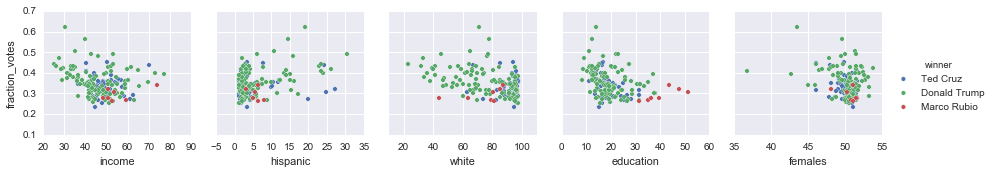

In [322]:
sns.pairplot(allData, hue="winner", 
             x_vars = ["income", "hispanic", "white", "education", 'females'], 
             y_vars = ["fraction_votes"])

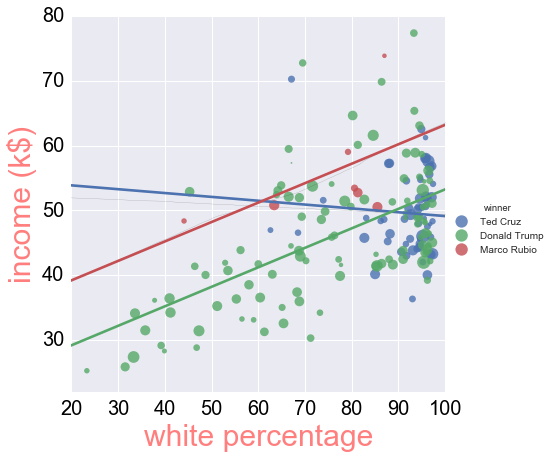

In [323]:
markerSize = (0.01+(allData.fraction_votes - allData.fraction_votes.min())/\
              (allData.fraction_votes.max() - allData.fraction_votes.min()))*300
g = sns.lmplot(x="white", y="income", data=allData, hue="winner", ci=False, scatter_kws={'s':markerSize}, size=6,
              legend_out=True)
for ax in g.axes.flat:
    ax.tick_params(labelsize=20,labelcolor="black")
g.set_xlabels("white percentage", size = 30,color="r",alpha=0.5)
g.set_ylabels("income (k$)", size = 30,color="r",alpha=0.5)
g.set(xlim=(20, 100), ylim=(22, 80))

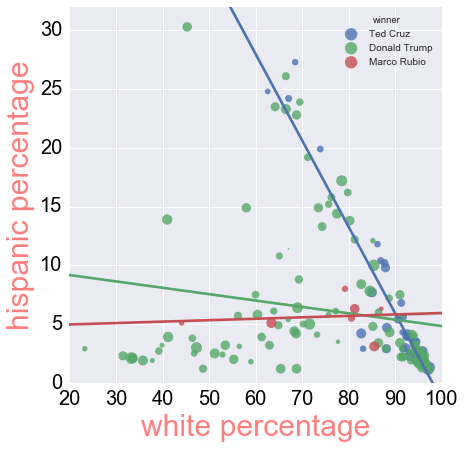

In [328]:
g = sns.lmplot(x="white", y="hispanic", data=allData, hue="winner", ci=False, scatter_kws={'s':markerSize}, size=6,
              legend_out=False)
for ax in g.axes.flat:
    ax.tick_params(labelsize=20,labelcolor="black")
g.set_xlabels("white percentage", size = 30,color="r",alpha=0.5)
g.set_ylabels("hispanic percentage", size = 30,color="r",alpha=0.5)
g.set(xlim=(20, 100), ylim=(0, 32))

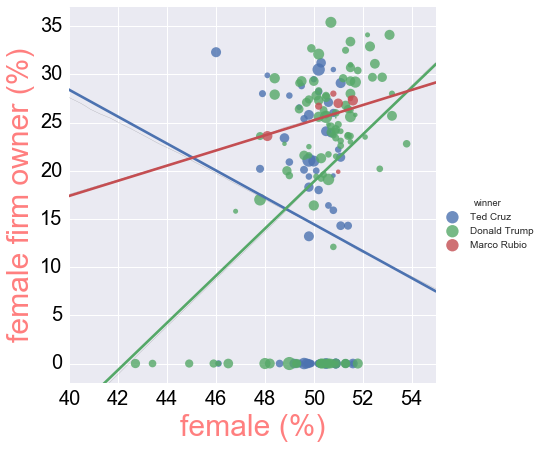

In [325]:
g = sns.lmplot(x="females", y="femaleFirmOwner", data=allData, hue="winner", ci=False, scatter_kws={'s':markerSize}, 
                   size=6, legend_out=True)
for ax in g.axes.flat:
    ax.tick_params(labelsize=20,labelcolor="black")
g.set_xlabels("female (%)", size = 30,color="r",alpha=0.5)
g.set_ylabels("female firm owner (%)", size = 30,color="r",alpha=0.5)
g.set(xlim=(40, 55), ylim=(-2, 37))

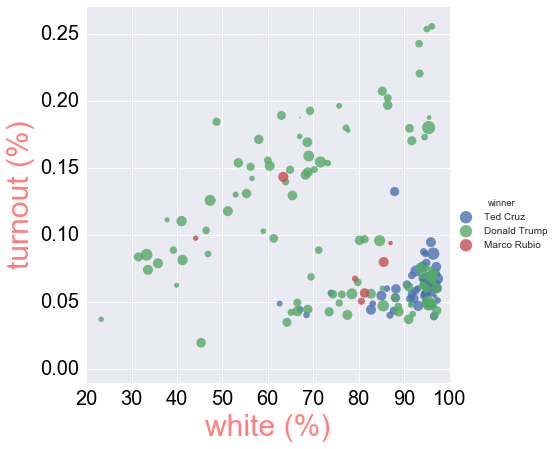

In [332]:
g = sns.lmplot(x="white", y="turnout", data=allData, hue="winner", ci=False, scatter_kws={'s':markerSize}, 
                   size=6, legend_out=True, fit_reg=False)
for ax in g.axes.flat:
    ax.tick_params(labelsize=20,labelcolor="black")
g.set_xlabels("white (%)", size = 30,color="r",alpha=0.5)
g.set_ylabels("turnout (%)", size = 30,color="r",alpha=0.5)
g.set(xlim=(20, 100), ylim=(-0.01, 0.27))